<p style="align: center;"><img align=center src="https://cdnb.artstation.com/p/assets/covers/images/060/407/559/large/vahid-ghobadi-arfai-vahid-ghobadi-arfai-lo.jpg?1678483232" width=300 height=320/></p>
<h3 style="text-align: center;"><b>Семинар №4 ФЭФМ МФТИ</b></h3>

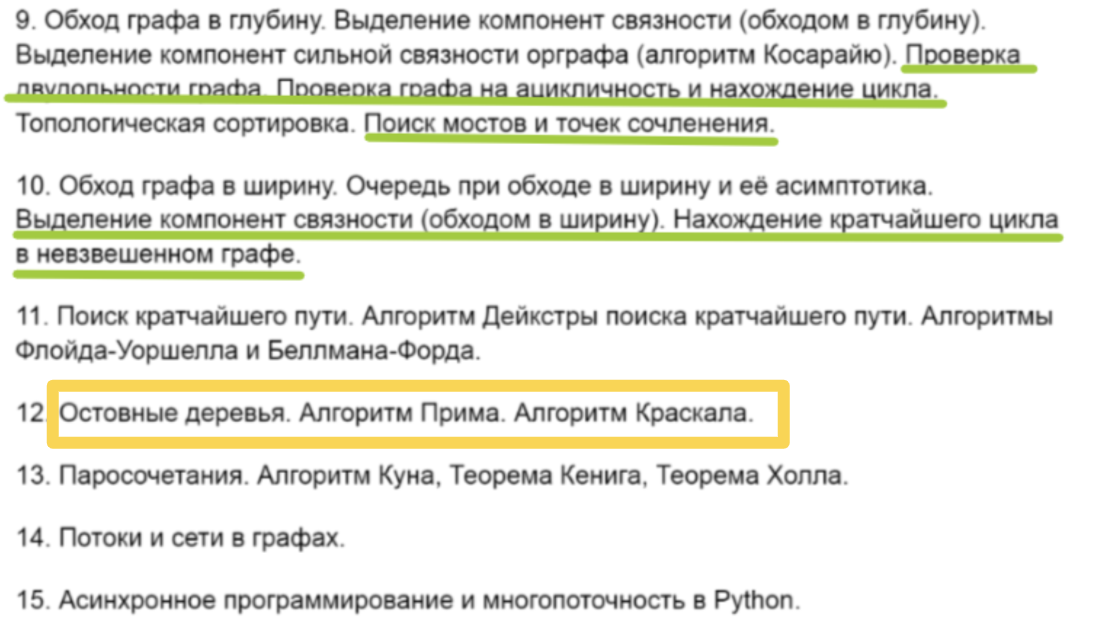

# Теория

### Немного теории Вам к зачету

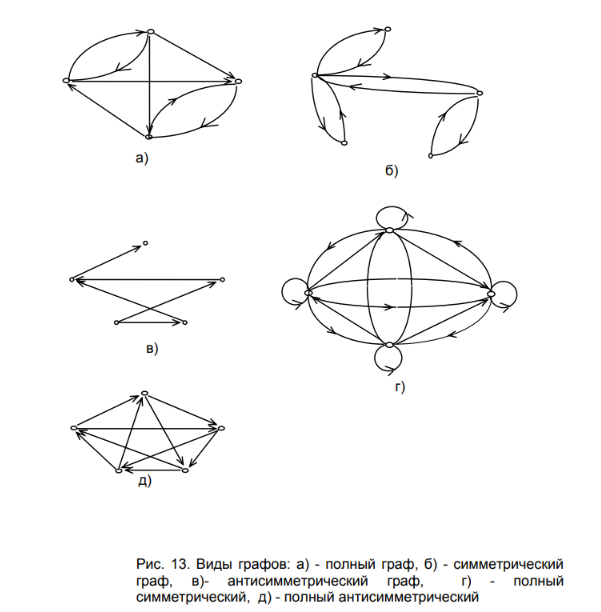

Регулярный граф — граф, степени всех вершин которого равны, то есть каждая вершина имеет одинаковое количество соседей. 

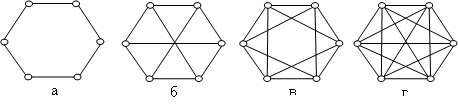

### Задания для самопроверки

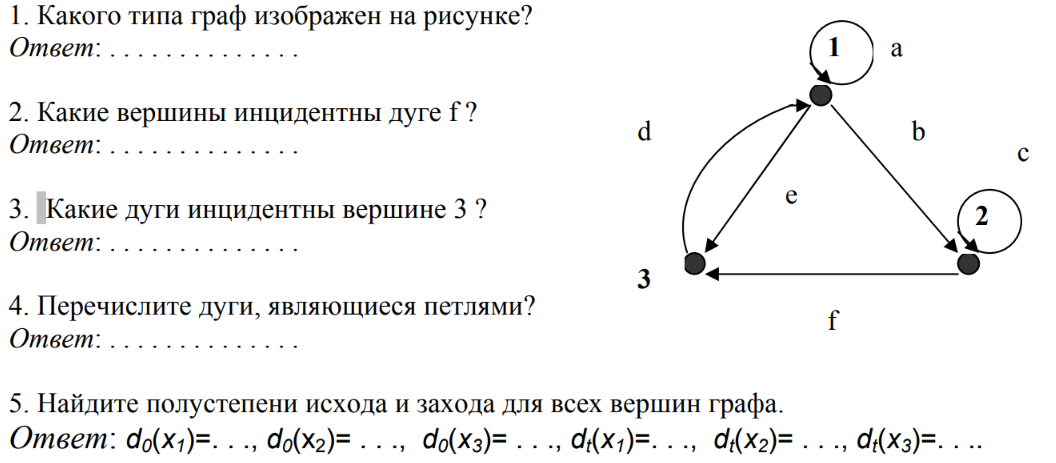

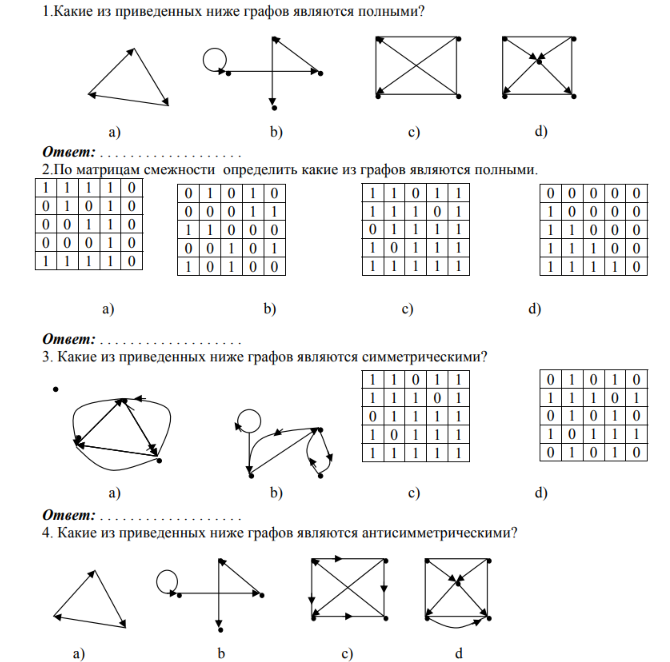

# Выделение компонент связности обходом в ширину

Компонента связности - набор вершин графа, в котором между любой парой вершин существует путь. В свою очередь одна вершина тоже составляет компоненту связности.

In [4]:
from collections import deque

In [6]:
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    
    while queue:
        node = queue.popleft()
        print(node, end=" ")
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E'],
    'I': ['J'], # Отдельная компонента
    'J': ['I']  # Отдельная компонента
}

# Запуск BFS от вершины 'A'
print("BFS от A:")
bfs(graph, 'A')

BFS от A:
A B C D E F G H 

In [8]:
def bfs(graph, start, visited, component):
    queue = deque([start])
    visited.add(start)
    component.append(start)
    
    while queue:
        node = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                component.append(neighbor)

def find_connected_components(graph):
    visited = set()
    components = []
    
    for node in graph:
        if node not in visited:
            component = []
            bfs(graph, node, visited, component)
            components.append(component)
    
    return components

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E'],
    'I': ['J'], # Отдельная компонента
    'J': ['I']  # Отдельная компонента
}

components = find_connected_components(graph)
print("Компоненты связности:")
for i, component in enumerate(components, 10):
    print(f"Компонента {i}: {component}")

print(components)

Компоненты связности:
Компонента 10: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Компонента 11: ['I', 'J']
[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ['I', 'J']]


# Проверка на двудольность графов

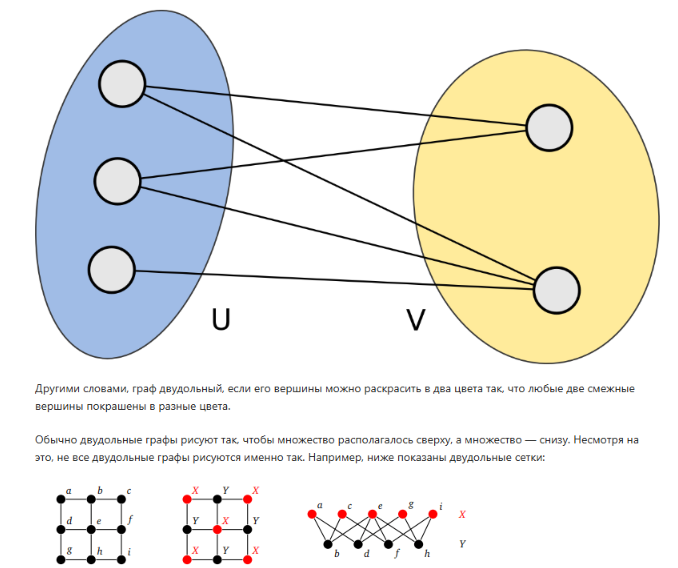

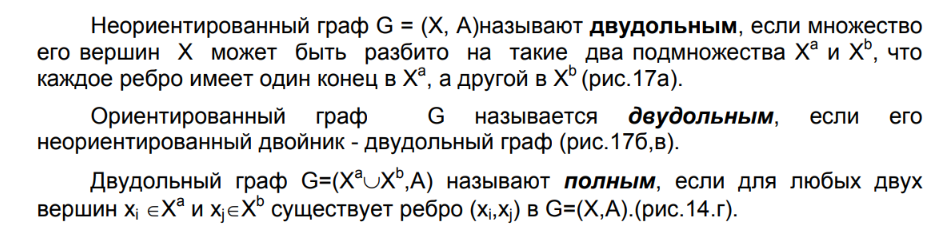

Граф G = (X, A) является двудольным тогда и только тогда, когда он не содержит
циклов нечетной длины. 

In [52]:
def is_bipartite_dfs(graph, node, colors=None, color=0):
    if colors is None:
        colors = {} 
    if node in colors:
        return colors[node] == color 
    colors[node] = color 
    
    for neighbor in graph[node]:
        print(node, neighbor)
        if not is_bipartite_dfs(graph, neighbor, colors, 1 - color):
            return False
    
    return True

def check_bipartite(graph):
    colors = {}  
    for node in graph:
        if node not in colors:  
            if not is_bipartite_dfs(graph, node, colors):
                return False  
    print(colors)
    return True

graph = {
    0: [1, 3],
    1: [0, 2],
    2: [1, 3],
    3: [0, 2]
}

print("Граф двудольный" if check_bipartite(graph) else "Граф не двудольный")

0 1
1 0
1 2
2 1
2 3
3 0
3 2
0 3
{0: 0, 1: 1, 2: 0, 3: 1}
Граф двудольный


In [20]:
graph2 = {
0: [1, 2, 3],
1: [0, 2, 3],
2: [0, 1, 3],
3: [0, 1, 2]
}
print("Граф двудольный" if check_bipartite(graph2) else "Граф не двудольный")# должен ли вывестись colors?

Граф не двудольный


Граф двудольный


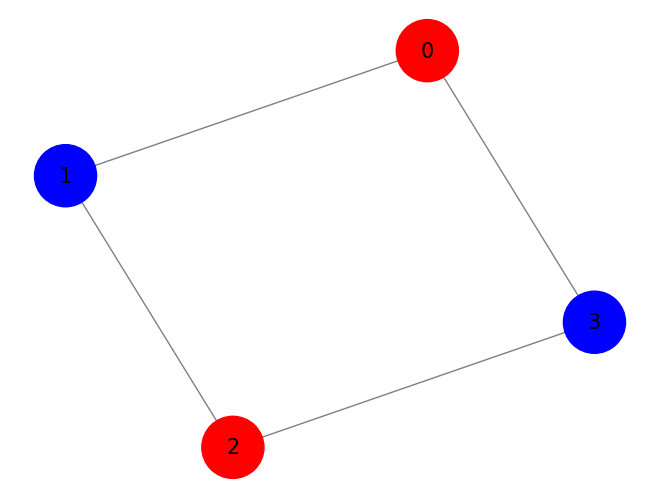

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def is_bipartite_dfs(graph, node, colors=None, color=0):
    if colors is None:
        colors = {} 
    if node in colors:
        return colors[node] == color  
    colors[node] = color 
    for neighbor in graph[node]:
        if not is_bipartite_dfs(graph, neighbor, colors, 1 - color):
            return False
    
    return True

def check_bipartite(graph):
    colors = {}  
    for node in graph:
        if node not in colors: 
            if not is_bipartite_dfs(graph, node, colors):
                return False  
    return colors 

def visualize_graph(graph):
    G = nx.Graph()
    colors = check_bipartite(graph)  
    if colors is False:
        print("Граф не двудольный")
        return
    
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    pos = nx.spring_layout(G)
    node_colors = ['red' if colors[node] == 0 else 'blue' for node in G.nodes()]
    
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=2000, font_size=15)
    plt.show()

graph = {
    0: [1, 3],  
    1: [0, 2],  
    2: [1, 3], 
    3: [0, 2]
}

if check_bipartite(graph):
    print("Граф двудольный")
    visualize_graph(graph)
else:
    print("Граф не двудольный")

In [40]:
def is_bipartite_dfs(graph, node, colors=None, color=0):
    if colors is None:
        colors = {}  
    if node in colors:
        return colors[node] == color 
    colors[node] = color 
    for neighbor in graph[node]:
        if not is_bipartite_dfs(graph, neighbor, colors, 1 - color):
            return False
    
    return True

def is_complete_bipartite(graph):
    colors = {}
    for node in graph:
        if node not in colors:
            if not is_bipartite_dfs(graph, node, colors):
                return False  
                
    # Разделяем вершины 
    gr_0 = {node for node, color in colors.items() if color == 0}
    gr_1 = {node for node, color in colors.items() if color == 1}
    
    for u in gr_0:
        for v in gr_1:
            if v not in graph[u]:
                return False  # Нет ребра между u и v
    
    return True

graph1 = {
    0: [1, 2, 3],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [0, 1, 2]
} 

graph2 = {
    0: [1, 2],
    1: [0],
    2: [0]
}  

graph3 = {
    0: [1, 2],
    1: [0],
    2: [0],
    3: []
}  

graph4 = {
    0: [1, 2],
    1: [0, 3],
    2: [0, 3],
    3: [1, 2]
}  
graph5 = {
    0: [1, 2],
    1: [0, 3],
    2: [0],
    3: [1]
}  

print("Граф 1 полный двудольный:", is_complete_bipartite(graph1))
print("Граф 2 полный двудольный:", is_complete_bipartite(graph2))
print("Граф 3 полный двудольный:", is_complete_bipartite(graph3))
print("Граф 4 полный двудольный:", is_complete_bipartite(graph4))
print("Граф 5 полный двудольный:", is_complete_bipartite(graph5))

Граф 1 полный двудольный: False
Граф 2 полный двудольный: True
Граф 3 полный двудольный: False
Граф 4 полный двудольный: True
Граф 5 полный двудольный: False


# Мосты и точки сочленения

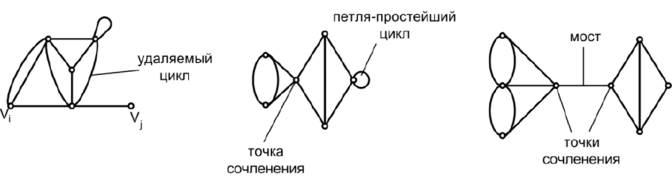

Наивный алгоритм поочередного удаления каждого ребра 
(
u
,
v
)
(u,v) и проверки наличия пути 
u
⇝
v
u⇝v потребует 
O
(
m
2
 ) операций. Чтобы научиться находить мосты быстрее, сначала сформулируем несколько утверждений, связанных с обходом в глубину.

Запустим DFS из произвольной вершины. Введем новые виды рёбер:

Прямые рёбра — те, по которым были переходы в dfs.

Обратные рёбра — то, по которым не было переходов в dfs.


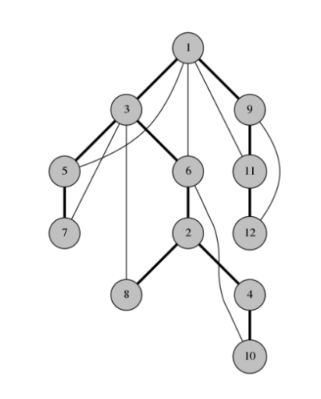

Заметим, что никакое обратное ребро 
(
u
,
v
)
(u,v) не может являться мостом: если его удалить, то всё равно будет существовать какой-то путь от 
u
u до 
v
v, потому что подграф из прямых рёбер является связным деревом.

Значит, остается только проверить все прямые рёбра. Это уже немного лучше — такой алгоритм будет работать за 

O(nm).

Соптимизировать его до линейного времени (до одного прохода dfs) поможет замечание о том, что обратные рёбра могут вести только «вверх» — к какому-то предку в дереве обхода графа, но не в другие «ветки» — иначе бы dfs увидел это ребро раньше, и оно было бы прямым, а не обратным.

Время входа (discovery[node])
Это момент, когда мы впервые посещаем узел во время обхода DFS. Это нужно для отслеживания порядка посещения узлов.

Минимальное достижимое время (low[node])
Показывает, насколько «ранний» узел мы можем достичь, двигаясь назад по дереву поиска DFS (через обратные рёбра). low[node] позволяет определить, соединяет ли ребро две части графа.

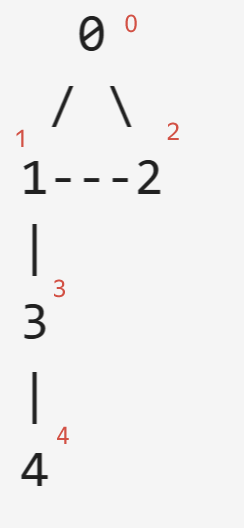

In [12]:
def find_bridges(graph):
    
    def dfs(node, parent):
        nonlocal timer
        visited[node] = True  
        discovery[node] = low[node] = timer
        timer += 1
        
        for neighbor in graph[node]: 
            print(node, discovery[node], low[node], parent, neighbor)
            if neighbor == parent: 
                continue
            if not visited[neighbor]:  
                dfs(neighbor, node) # node становится parent для neighbor!!!!!!!
                low[node] = min(low[node], low[neighbor]) 
                if low[neighbor] > discovery[node]: 
                    bridges.append((node, neighbor))  # Это мост
            else:
                low[node] = min(low[node], discovery[neighbor])  # Обновляем low[node], если еще путь к посещенной вершине

    visited = {node: False for node in graph}  
    discovery = {node: -1 for node in graph} 
    low = {node: -1 for node in graph} 
    bridges = [] 
    timer = 0  

    
    for node in graph:
        if not visited[node]: 
            dfs(node, -1)
    
    return bridges

graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1],
    3: [1, 4],
    4: [3]
}

bridges = find_bridges(graph)
print("Мосты:", bridges)

0 0 0 -1 1
1 1 1 0 0
1 1 1 0 2
2 2 2 1 0
2 2 0 1 1
1 1 0 0 3
3 3 3 1 1
3 3 3 1 4
4 4 4 3 3
0 0 0 -1 2
Мосты: [(3, 4), (1, 3)]


Вершина 
v является точкой сочленения, когда из какого-то её ребёнка 
u нельзя дойти до её предка, не используя ребро 
(
v
,
u
)

In [24]:
def find_articulation_points(graph):
    def dfs(node, parent):
        nonlocal timer
        visited[node] = True
        discovery[node] = low[node] = timer
        timer += 1
        children = 0  # Количество детей в дереве DFS
        
        for neighbor in graph[node]:
            if neighbor == parent:  
                continue
            if not visited[neighbor]: 
                children += 1
                dfs(neighbor, node)
                low[node] = min(low[node], low[neighbor])  
                
                # Правила определения точки сочленения :)
                # 1. Если это не корень, но у ребёнка нет пути вверх без этой вершинки
                if parent != -1 and low[neighbor] >= discovery[node]:
                    articulation_points.add(node)

            else:
                low[node] = min(low[node], discovery[neighbor])  # Обратное ребро 

        # 2. Если это корень и у него >1 ребёнка, это точка сочленения
        if parent == -1 and children > 1:
            articulation_points.add(node)

    visited = {node: False for node in graph}
    discovery = {node: -1 for node in graph}
    low = {node: -1 for node in graph}
    articulation_points = set()
    timer = 0

    for node in graph:
        if not visited[node]:  
            dfs(node, -1)

    return articulation_points

graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1],
    3: [1, 4],
    4: [3]
}

articulation_points = find_articulation_points(graph)
print("Точки сочленения:", articulation_points)

Точки сочленения: {1, 3}


In [16]:
graph = {
    0: [1, 2],
    1: [0, 3],
    2: [0],
    3: [1, 4],
    4: [3]
}

articulation_points = find_articulation_points(graph)
print("Точки сочленения:", articulation_points)

Точки сочленения: {0, 1, 3}


# Проверка на цикличность и ацикличность. Поиск циклов

In [ ]:
def has_cycle_dfs(graph, node, visited, parent, cycle):
    visited.add(node)
    cycle.append(node)
    
    for neighbor in graph[node]:
        if neighbor not in visited:
            if has_cycle_dfs(graph, neighbor, visited, node, cycle):
                return True
        elif parent != neighbor:
            cycle.append(neighbor)
            return True
    
    cycle.pop()
    return False

def find_cycle(graph):
    visited = set()
    for node in graph:
        if node not in visited:
            cycle = []
            if has_cycle_dfs(graph, node, visited, -1, cycle):
                cycle_start = cycle.index(cycle[-1])
                return cycle[cycle_start:]
    return None

def check_acyclic(graph):
    return find_cycle(graph) is None


unweighted_graph = {
    0: [1, 3],
    1: [0, 2],
    2: [1, 3],
    3: [0, 2, 4],
    4: [3]
}

cycle = find_cycle(unweighted_graph)
if cycle:
    print("Есть цикл:", cycle)
else:
    print("Ациклический")

Есть цикл: [0, 1, 2, 3, 0]


In [ ]:
def has_weighted_cycle_dfs(graph, node, visited, parent, cycle, path_length):
    visited.add(node)
    cycle.append((node, path_length))
    
    for neighbor, weight in graph[node]:
        if neighbor not in visited:
            if has_weighted_cycle_dfs(graph, neighbor, visited, node, cycle, path_length + weight):
                return True
        elif parent != neighbor:
            cycle.append((neighbor, path_length + weight))
            return True
    
    cycle.pop()
    return False

def find_weighted_cycle(graph):
    visited = set()
    for node in graph:
        if node not in visited:
            cycle = []
            if has_weighted_cycle_dfs(graph, node, visited, -1, cycle, 0):
                cycle_start = next(i for i, (n, _) in enumerate(cycle) if n == cycle[-1][0])
                cycle_path = cycle[cycle_start:]
                total_weight = cycle_path[-1][1] - cycle_path[0][1]
                #[-1] и [0] так как -1 это последняя вершина цикла (вторая встреча ее), а 0 первая
                #см скриншот!!!!
                #[1] чтобы вычленить вес (он в кортеже на позиции 1)
                return [n for n, _ in cycle_path], total_weight
    return None, 0

def check_weighted_acyclic(graph):
    cycle, _ = find_weighted_cycle(graph)
    return cycle is None


weighted_graph = {
    0: [(1, 4), (3, 2)],
    1: [(0, 4), (2, 1)],
    2: [(1, 1), (3, 3)],
    3: [(0, 2), (2, 3)]
}

cycle, weight = find_weighted_cycle(weighted_graph)
if cycle:
    print("Есть цикл", cycle, "с весом:", weight)
else:
    print("Ациклический")

0
Есть цикл [0, 1, 2, 3, 0] с весом: 10


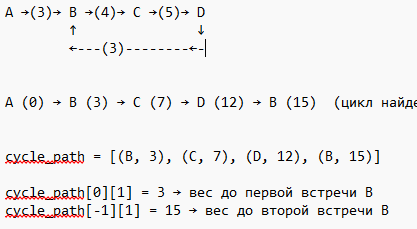

Граф двудольный
Граф содержит цикл


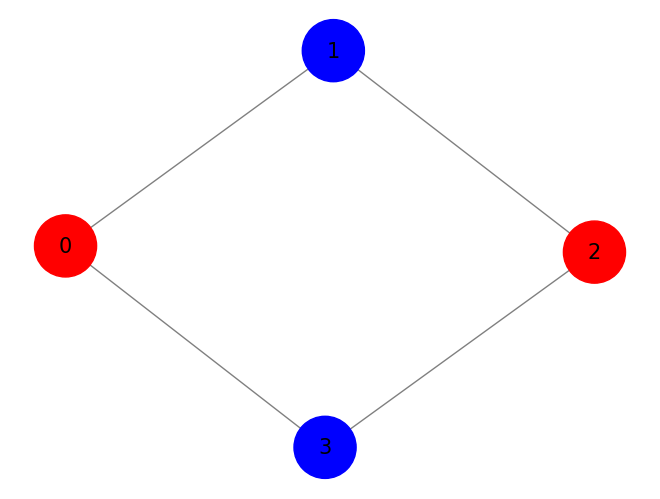

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

def is_bipartite_dfs(graph, node, colors=None, color=0):
    if colors is None:
        colors = {}  
    if node in colors:
        return colors[node] == color 
    
    colors[node] = color
    
    for neighbor in graph[node]:
        if not is_bipartite_dfs(graph, neighbor, colors, 1 - color):
            return False
    
    return True

def check_bipartite(graph):
    colors = {}  
    for node in graph:
        if node not in colors: 
            if not is_bipartite_dfs(graph, node, colors):
                return False 
    return colors 

def has_cycle_dfs(graph, node, visited, parent):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            if has_cycle_dfs(graph, neighbor, visited, node):
                return True
        elif parent != neighbor:
            return True
    return False

def check_acyclic(graph):
    visited = set()
    for node in graph:
        if node not in visited:
            if has_cycle_dfs(graph, node, visited, -1):
                return False  # Граф содержит цикл
    return True  # Граф ацикличный

def visualize_graph(graph):
    G = nx.Graph()
    colors = check_bipartite(graph)  
    if colors is False:
        print("Не двудольный...")
        return
    
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    pos = nx.spring_layout(G)
    node_colors = ['red' if colors[node] == 0 else 'blue' for node in G.nodes()]
    
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=2000, font_size=15)
    plt.show()


graph = {
    0: [1, 3],  
    1: [0, 2],  
    2: [1, 3],  
    3: [0, 2]   
}

if check_bipartite(graph):
    print("Граф двудольный")
else:
    print("Граф не двудольный")

if check_acyclic(graph):
    print("Граф ациклический")
else:
    print("Граф содержит цикл")

visualize_graph(graph)

### Поиск кратчайшего цикла в невзвешенном графе

In [7]:
cycles = []
path = [1, 2, 3]

cycles.append(path) 
print(cycles) 

path.append(4)  
print(cycles)  

[[1, 2, 3]]
[[1, 2, 3, 4]]


In [8]:
cycles = []
path = [1, 2, 3]

cycles.append(path[:])  # Добавляем КОПИЮ path
print(cycles)

path.append(4)
print(cycles)  
print(path)
print(type(cycles))

[[1, 2, 3]]
[[1, 2, 3]]
[1, 2, 3, 4]
<class 'list'>


In [9]:
def find_all_cycles(graph):
    def dfs(node, start, visited, path):
        visited.add(node) # почему add|append? не подглядывать!
        path.append(node)
        
        for neighbor in graph[node]:
            if neighbor == start and len(path) > 2: # мы замкнули цикл!)
                cycles.append(path[:])
            elif neighbor not in visited:
                dfs(neighbor, start, visited, path)
        
        path.pop()  # удаляем вершину из пути перед возвратом (чтобы не мешала другим веткам DFS)
        visited.remove(node)  # Делаем её доступной для других возможных путей
    
    cycles = []
    for node in graph:
        dfs(node, node, set(), [])
    return cycles

def find_shortest_cycle(graph):
    all_cycles = find_all_cycles(graph)
    if not all_cycles:
        return None
    return min(all_cycles, key=len)

unweighted_graph = {
    0: [1, 3],
    1: [0, 2, 3],
    2: [1, 5],
    3: [0, 1, 4],
    4: [3, 5],
    5: [4, 2]
}

# Поиск всех циклов
cycles = find_all_cycles(unweighted_graph)
print("Все циклы:", cycles)

# Поиск кратчайшего цикла
shortest_cycle = find_shortest_cycle(unweighted_graph)
print("Кратчайший цикл:", shortest_cycle)

Все циклы: [[0, 1, 2, 5, 4, 3], [0, 1, 3], [0, 3, 1], [0, 3, 4, 5, 2, 1], [1, 0, 3], [1, 0, 3, 4, 5, 2], [1, 2, 5, 4, 3, 0], [1, 2, 5, 4, 3], [1, 3, 0], [1, 3, 4, 5, 2], [2, 1, 0, 3, 4, 5], [2, 1, 3, 4, 5], [2, 5, 4, 3, 0, 1], [2, 5, 4, 3, 1], [3, 0, 1, 2, 5, 4], [3, 0, 1], [3, 1, 0], [3, 1, 2, 5, 4], [3, 4, 5, 2, 1, 0], [3, 4, 5, 2, 1], [4, 3, 0, 1, 2, 5], [4, 3, 1, 2, 5], [4, 5, 2, 1, 0, 3], [4, 5, 2, 1, 3], [5, 4, 3, 0, 1, 2], [5, 4, 3, 1, 2], [5, 2, 1, 0, 3, 4], [5, 2, 1, 3, 4]]
Кратчайший цикл: [0, 1, 3]


In [53]:
my_set = {1, 2, 3}
my_set.add(4)
print(my_set) 
my_set.add([5, 6])

{1, 2, 3, 4}


TypeError: unhashable type: 'list'

In [55]:
my_set.append(8)

AttributeError: 'set' object has no attribute 'append'

попробуйте оптимизировать

### А теперь в взвешенном

In [67]:
def find_all_weighted_cycles(graph, weights):
    def dfs(node, start, visited, path, weight_sum):
        visited.add(node)
        path.append(node)
        
        for neighbor in graph[node]:
            edge_weight = weights.get((node, neighbor)) or weights.get((neighbor, node))  # Получаем вес рёбера
            if neighbor == start and len(path) > 2:
                cycles.append((path[:], weight_sum + edge_weight))  # Добавляем цикл с суммой веса
            elif neighbor not in visited:
                dfs(neighbor, start, visited, path, weight_sum + edge_weight)
        
        path.pop()
        visited.remove(node)
    
    cycles = []
    for node in graph:
        dfs(node, node, set(), [], 0)
    return cycles

def find_lightest_cycle(graph, weights):
    all_cycles = find_all_weighted_cycles(graph, weights)
    if not all_cycles:
        return None
    return min(all_cycles, key=lambda cycle: cycle[1])  # Сортируем по весу, почему индекс 1?

# Взвешенный граф
weighted_graph = {
    0: [1, 3],
    1: [0, 2, 3],
    2: [1, 5],
    3: [0, 1, 4],
    4: [3, 5],
    5: [4, 2]
}

# Веса рёбер
edge_weights = {
    (0, 1): 2,
    (1, 0): 2,
    (1, 2): 3,
    (2, 1): 3,
    (1, 3): 4,
    (3, 1): 4,
    (3, 0): 1,
    (0, 3): 1,
    (2, 5): 5,
    (5, 2): 5,
    (3, 4): 6,
    (4, 3): 6,
    (4, 5): 2,
    (5, 4): 2
}

# Поиск всех циклов с учётом веса рёбер
weighted_cycles = find_all_weighted_cycles(weighted_graph, edge_weights)
print("Все циклы с весами:", weighted_cycles)

# Поиск цикла с наименьшим весом
lightest_cycle = find_lightest_cycle(weighted_graph, edge_weights)
print("Цикл с наименьшим весом:", lightest_cycle)

Все циклы с весами: [([0, 1, 2, 5, 4, 3], 19), ([0, 1, 3], 7), ([0, 3, 1], 7), ([0, 3, 4, 5, 2, 1], 19), ([1, 0, 3], 7), ([1, 0, 3, 4, 5, 2], 19), ([1, 2, 5, 4, 3, 0], 19), ([1, 2, 5, 4, 3], 20), ([1, 3, 0], 7), ([1, 3, 4, 5, 2], 20), ([2, 1, 0, 3, 4, 5], 19), ([2, 1, 3, 4, 5], 20), ([2, 5, 4, 3, 0, 1], 19), ([2, 5, 4, 3, 1], 20), ([3, 0, 1, 2, 5, 4], 19), ([3, 0, 1], 7), ([3, 1, 0], 7), ([3, 1, 2, 5, 4], 20), ([3, 4, 5, 2, 1, 0], 19), ([3, 4, 5, 2, 1], 20), ([4, 3, 0, 1, 2, 5], 19), ([4, 3, 1, 2, 5], 20), ([4, 5, 2, 1, 0, 3], 19), ([4, 5, 2, 1, 3], 20), ([5, 4, 3, 0, 1, 2], 19), ([5, 4, 3, 1, 2], 20), ([5, 2, 1, 0, 3, 4], 19), ([5, 2, 1, 3, 4], 20)]
Цикл с наименьшим весом: ([0, 1, 3], 7)


Попробуйте проверить)

# Задача

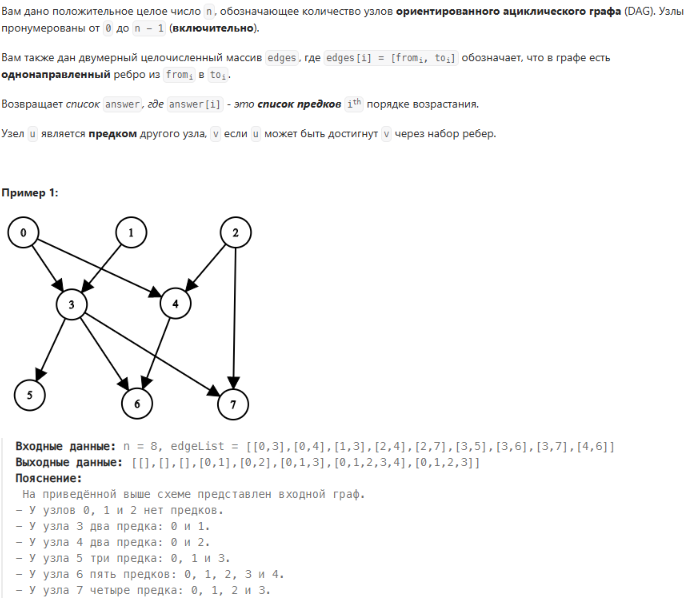

# Остовные деревья

Наличие цикла в подграфе означает, что у нас есть лишнее ребро, поэтому нам не нужны никакие циклы. Так мы ищем связный подграф без циклов, который включает в себя все вершины исходного графа. Такой граф называется связным деревом.

Ниже показаны два графа со связными деревьями:


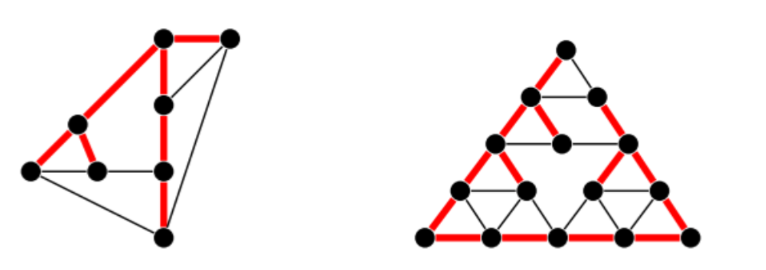

Остовное дерево — это частный случай связного дерева, применяемый к конкретному графу.

Остовное дерево — это ациклический подграф связного графа, который содержит все его вершины и также представляет собой дерево.

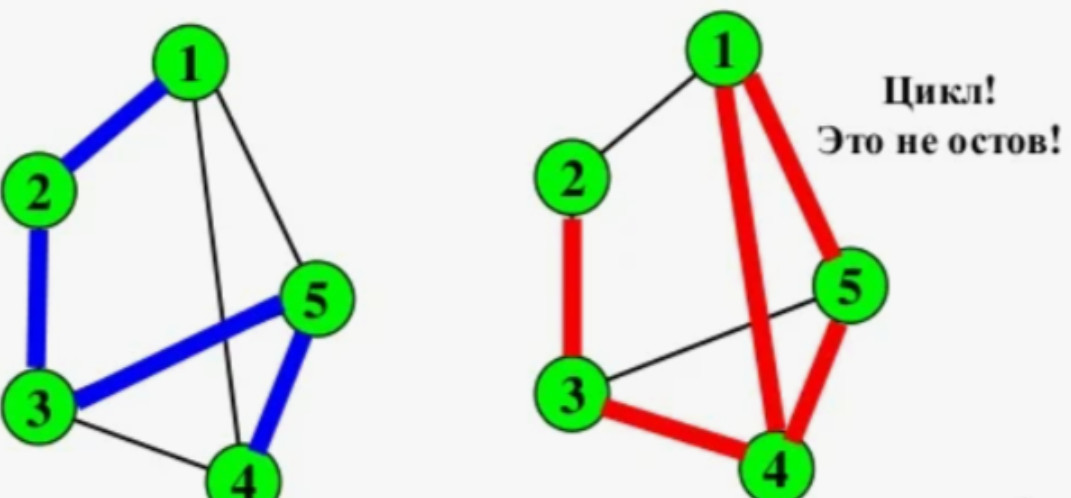

## Алгоритм Прима

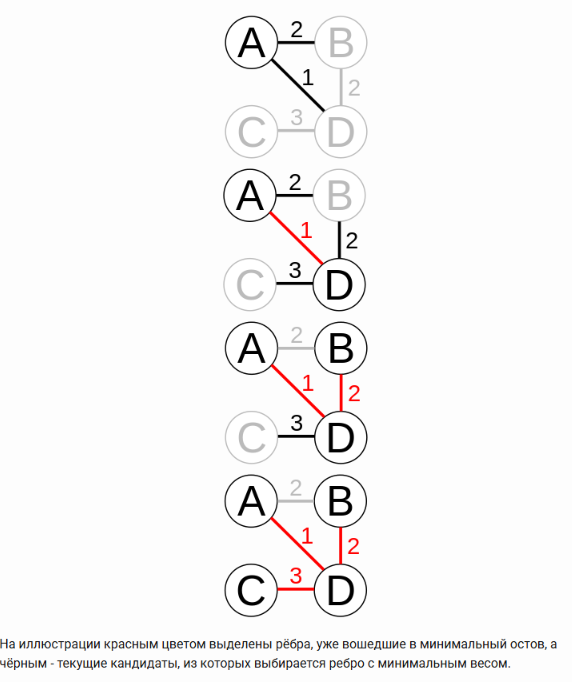

In [92]:
import heapq

def prim(graph, start):
    mst = []  # Минимальное остовное дерево
    visited = set([start])  # Посещенные вершины
    edges = [
        (weight, start, neighbor)
        for neighbor, weight in graph[start].items()
    ]
    print (edges)
    heapq.heapify(edges)  # Преобразуем список в кучу (min-heap), пользуемся библиотекой, так как не на контесте))

    while edges:  #То есть пока в куче есть ребра
        print(edges)
        weight, u, v = heapq.heappop(edges)  # Извлекаем ребро с минимальным весом
        if v not in visited:
            visited.add(v)  # Добавляем вершину в посещенные
            mst.append((u, v, weight))  # Добавляем ребро в MST

            # Добавляем рёбра, ведущие из новой вершины
            for neighbor, weight in graph[v].items():
                if neighbor not in visited:
                    heapq.heappush(edges, (weight, v, neighbor)) # помещаем в edges
    print(edges)
    return mst

graph = {
    'A': {'B': 2, 'D': 3},
    'B': {'A': 2, 'C': 1, 'D': 4},
    'C': {'B': 1, 'D': 2},
    'D': {'A': 3, 'B': 4, 'C': 2}
}

mst_prim = prim(graph, 'A')
print("Минимальное остовное дерево:", mst_prim)

[(2, 'A', 'B'), (3, 'A', 'D')]
[(2, 'A', 'B'), (3, 'A', 'D')]
[(1, 'B', 'C'), (3, 'A', 'D'), (4, 'B', 'D')]
[(2, 'C', 'D'), (4, 'B', 'D'), (3, 'A', 'D')]
[(3, 'A', 'D'), (4, 'B', 'D')]
[(4, 'B', 'D')]
[]
Минимальное остовное дерево: [('A', 'B', 2), ('B', 'C', 1), ('C', 'D', 2)]


## Алгоритм Краскала

Лес — это несвязный неориентированный граф без циклов, состоящий из нескольких компонент, каждая из которых является деревом

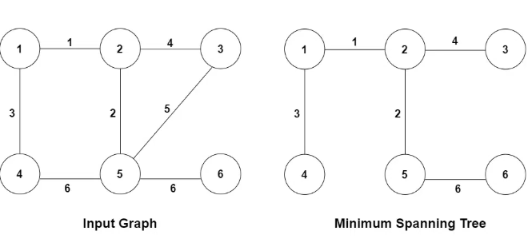

Структура непересекающихся множеств

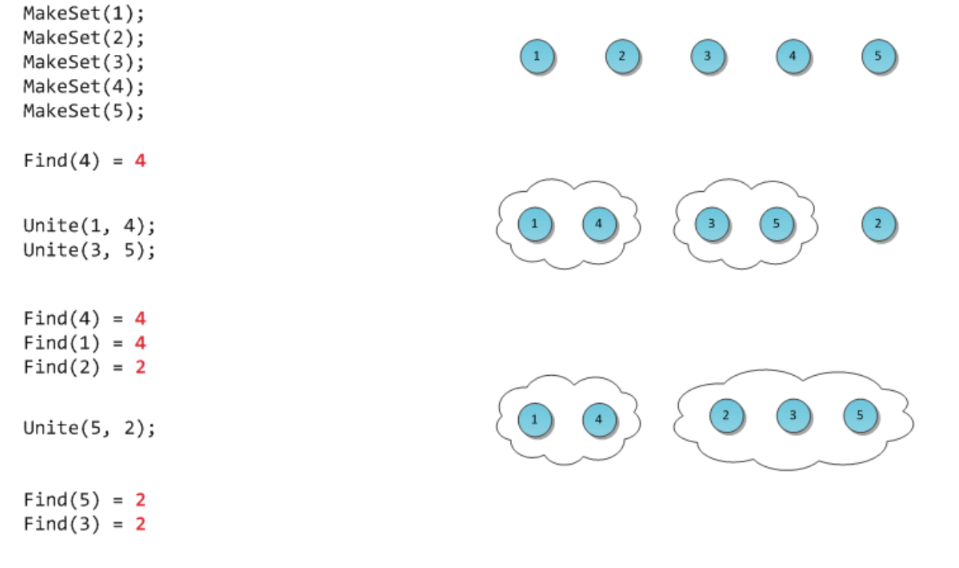

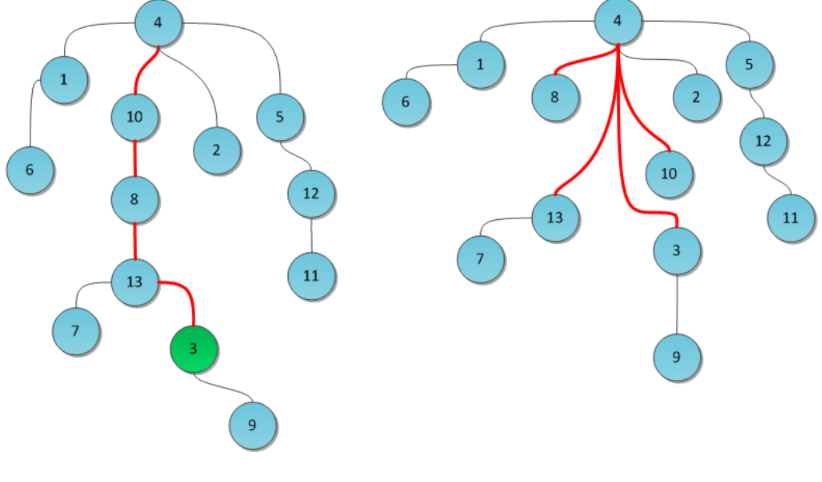

Что принципиально поменялось?

In [111]:
class DisjointSet:
    def __init__(self, n):
        """Инициализация структуры непересекающихся множеств"""
        self.parent = list(range(n))  # Каждый элемент сам себе родитель
        self.rank = [0] * n  # Глубина дерева множества
    
    def find(self, u):
        """Находит корень множества, к которому принадлежит u, с применением сжатия пути"""
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])  # Сжатие пути
        return self.parent[u]
    
    def union(self, u, v):
        """Объединяет два множества по рангу"""
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1


def kruskal(n, edges):
    edges.sort()  # Сортируем рёбра по весу
    ds = DisjointSet(n)  
    mst = []  # Список рёбер MST
    total_weight = 0  # Общий вес MST
    
    for weight, u, v in edges:
        if ds.find(u) != ds.find(v):  # Проверяем, образует ли добавление цикла
            ds.union(u, v)  # Объединяем множества
            mst.append((u, v, weight))  # Добавляем ребро в MST
            total_weight += weight  # Увеличиваем общий вес MST
    
    return mst, total_weight

n = 5
edges = [  
    (1, 0, 1), # (вес, вершина1, вершина2)
    (3, 0, 2),
    (2, 1, 2),
    (4, 1, 3),
    (5, 2, 3),
    (7, 3, 4)
]

mst, weight = kruskal(n, edges)
print("Минимальное остовное дерево (в1, в2, вес):", mst)
print("Общий вес MST:", weight)

Минимальное остовное дерево (в1, в2, вес): [(0, 1, 1), (1, 2, 2), (1, 3, 4), (3, 4, 7)]
Общий вес MST: 14


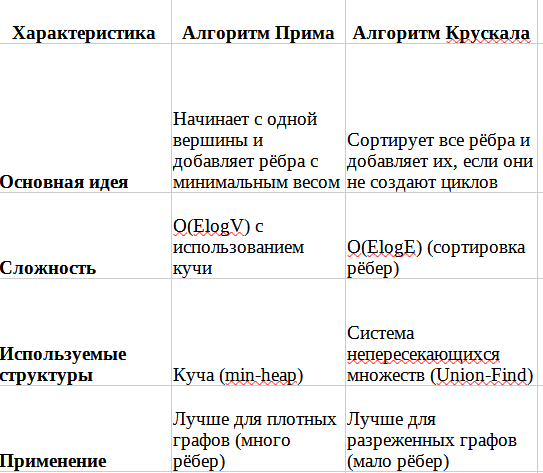

# Паросочетания

Паросочетание в графе — это множество рёбер, попарно не имеющих общих вершин.

Задача о паросочетании состоит в том, чтобы в данном графе найти паросочетание с наибольшим числом рёбер. 

Формальное определение

Паросочетанием в графе называется произвольное множество его
ребер такое, что каждая вершина графа инцидентна не более чем
одному ребру из этого множества.

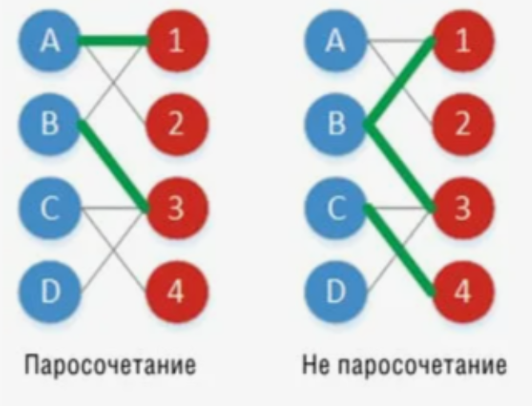

Самые разные практические задачи связаны с построением тех
или иных паросочетаний в двудольных графах

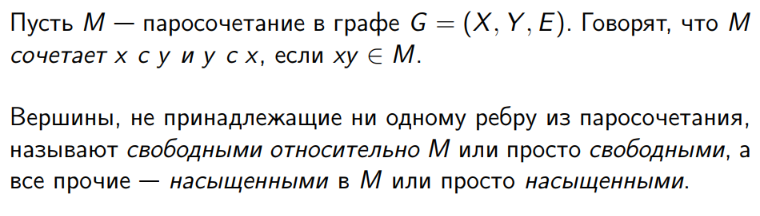